# A basic population model

## Characterizing populations

One way to describe populations is to look at how many individuals they contain at various times. Or, instead of individuals, it may be more reasonable to consider total biomass -- the total weight of all individuals in the population combined. For example, the number of trees may not be as important as their total weight, or the total area of their canopy. Density may also be relevant—how many individuals occupy a unit of area, or the percentage covered by the population in an area. All of these are gross properties of populations that can enter models.

Additional properties that can be taken into account include the age structure -- the portions of the population of various ages, and the size structure -- the portions of the population of various sizes. Such detail can be important because juveniles or older individuals may not reproduce. Genetic structure can also be important; it is often left out of ecological models, but evolutionary directions can affect the ecology as well. Another important measure is the rate of change—how fast the population is changing. A population can be constant, increasing, or decreasing, or can fluctuate in complex ways.

Remember that a model is just a simpler view of something complex, and that all scientific models are just approximations of nature. When the full complexity cannot be understood, which is almost always, we can try to construct a simplified model in hopes of finding the essence.

## Bacterial growth

The place to start a discussion of basic population models is in discrete-time at the macroscale -- the most basic. Consider a hypothetical strain of bacteria reproducing every hour.Suppose a colony is started with a single bacterium when the clock reads zero, symbolized t = 0, and one hour later that bacterium divides into two, by time t = 1. Each of those divides in two one hour after that, by time t = 2. And so forth. Suppose you start this culture on a lab bench on Monday, let it go unchecked, and then come back late on Friday to see the results.

If the colony grows unchecked in this way, how many bacteria will there be at the end of the work week, after five full days of growth? You could figure that out on a calculator, or more easily you could use computer code. More easily, that is, once you know computer coding.

Because computer coding is becoming embedded in almost every aspect of life, appreciating the basics of coding is meaningful for each educated citizen of this century, and this book will expose you to the basics.

## A first computer model

Below are two lines of computer code forming a program that models the bacterial colony as it doubles every hour written in R. We will go through the code carefully below.

``` r
N <- 1
time <- 1:(5 * 24) # create a sequence on numbers from 1 to 5 * 25, incrementing by 1
for(t in  time) {
  N <- N * 2
  }
```

```{warning}
The way the model is implemeted differs slightly from that of the original textbook, which used a `while` loop. These loops can run forever if not correctly specified, so are a bit dangerous for an interactive learning exercise. The actual model and results are the same.
```

The first “statement” is `N <- 1`. That instructs the computer to set the number of bacteria, `N`, equal to 1. The second line determines the starting generation time and how many generations will be run using a list called `time`. In R the colon (`:`) is used to create a list that increments by 1 from the number before the colon to the number after the colon, *e.g.*, `1:3` becomes `1 2 3`. So, `time <- 1:(5 * 24)` instructs the computer to set the time from `1` to `5 * 24`. We put parentheses over the last expression to make sure that it's computer first, before the list is created, or you would get `(1:5) * 24` using R's rules of [operator precedence](https://stat.ethz.ch/R-manual/R-devel/library/base/html/Syntax.html). So, the final list will contain 120 items corresponding to the time steps of the model: `1 2 3 ... 119 120`. One bacterium at time one forms the “initial conditions,” and once the computer has finished that line, the program is said to be “initialized.” 

Note that a `#` character indicates that everything following it is a comment and is not parsed by the language interpreter. Comments are great at explaining what code does, and you should use the liberally. Over time you may yourself forget why you wrote a particular line of code or what it's supposed to do.

The third line of the program is more involved, but can be understood in two parts. The first part on the left, `for(t in time)`, instructs the computer to loop over each value in the list called `time`. During each loop it chooses a value in a sequence and assigns it to the variable `t`. So, this is done for 5 simulated days of 24 hours each. The second part is the code to be repeated, within braces on the right, `{...}`. 

Computer coding is an exacting business, where tiny variations can make huge differences. Missing parentheses, commas, or even incorrect line breaks can cause your code to fail. If you are accustomed to coding, you will already be familiar with such subtleties; if this is all new to you, it is something to get used to. Various primers on the web can help, but don’t be discouraged if it seems difficult at first; computer coding turns out to be one of the easiest things to jump into but one of the most difficult areas of all human endeavour to get exactly right. Time and patience will assist. 

At the moment the loop contains only one statement, `N <- N * 2`, is read “N equals N times two. ”It is similar in form to the statement on the first line, `N <- 1`, which started things off with a single bacterium. The `N <-` part is the same. It tells the computer that the number of bacteria, N, is about to change. (Of course, the computer has no clue what the program is about—that you are running a program about bacteria.) What N will change to is immediately to the right of the equal sign, `N * 2`. So this statement thus tells the computer to double the value of N. That is what the hypothesized bacterial population does every hour, so this statement models that doubling. 

After the loop has executed its statement(s) it will pull the next value from `steps` and run again, until there are no more values in `steps` left to run, *i.e.*. 120 times.

This code illustrates looping, a fundamental aspects of computer coding. In larger programs loops are “nested” within other loops and condition tests are nested correspondingly. But this simple program is sufficient for our first model. You will soon see that this is not a trivial model, but one that demonstrates an inviolable law of biology, which Darwin put directly to use in creating his theory of evolution.

##  Program results

As it happens, the program above correctly computes the results, but it doesn't actually save or print them. Not very useful. Here we modify it slightly to save and print the results into a table, called a [`data.frame`](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/data.frame) in R terminology. During each iteration of the loop, we save the results to a row of this table specified by the time in the `t` variable, which we didn't use at all in the code above. Printing `populations` by itself in the last line dumps its contents to the screen. In real modeling or data analysis exercises you'll always be storing your results as various kinds of data structures, so that you can manipulate and analyze them.

In [1]:
N <- 1
time <- 1:(5 * 24)
populations <- data.frame(size = integer()) # create an empty table with one column called "size", to be filled with numbers
for(t in time) {
  N <- N * 2
  populations[t, "size"] = N # save the output to the table
  }
populations # print the results!

,size
,<dbl>
1,2
2,4
3,8
4,16
5,32
6,64
7,128
8,256
9,512


```{admonition} Evaluating the code
:class: tip
You can change and re-run this code interactively using the "Live Code" option available under the <span class="fas fa-rocket"></span> icon at the top of the page. You can then modify the code and re-run it. Note that the the order in which you evaluate cells in a web page matters. For example, you need to run the model before you can plot its results.
```

Between Monday and Friday, 120 bacterial doublings would produce over $10^{36}$ bacteria—that’s 1 followed by 36 zeros. That is the computational result, which looks like an exponential increase. We can plot it using the R `ggplot2` graphics library.

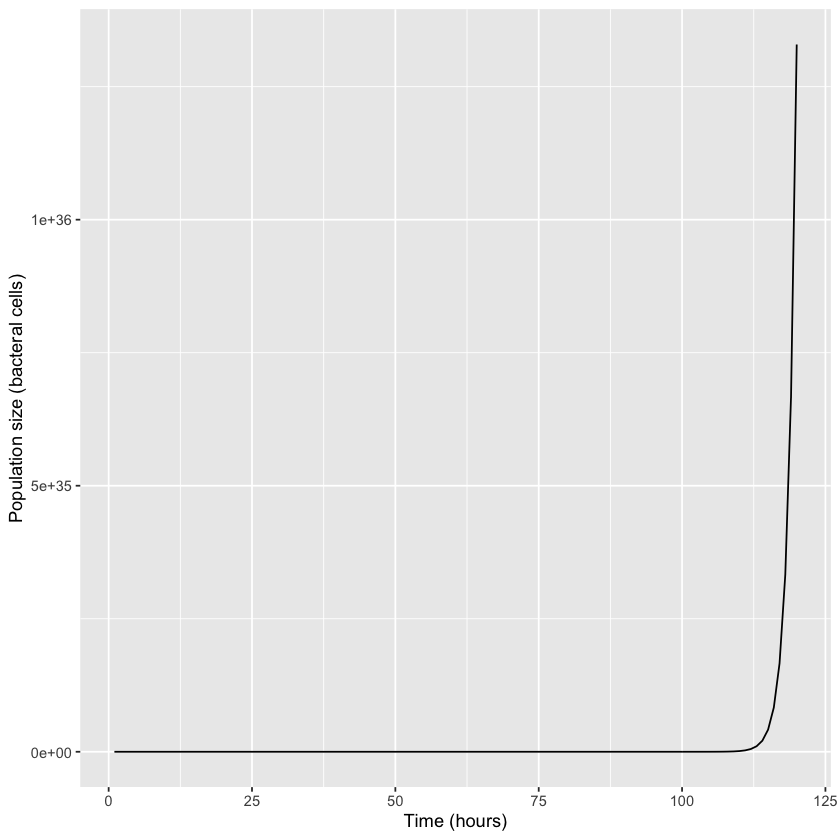

In [2]:
library(ggplot2)
ggplot(populations, aes(x=1:(5*24), size)) + geom_line() + xlab("Time (hours)") + 
  ylab("Population size (bacteral cells)")

 The scientific question is how many individuals this amounts to. Worked out exactly, it is this number: $2^{120} = 1,329,227,995,784,915,872,903,807,060,280,344,576$. To understand the size of this number, suppose the bacteria are roughly cubical 1 µm on a side—one millionth of a meter, or about four hundred thousandths of an inch (a suitable order-of-magnitude for a bacterium). What volume will the colony occupy in cubic meters at the end of the work week, after five full days of growing unchecked? You might want to speculate: will it fill the culture plate, overflow onto the lab bench, fill the lab, or what?

Work it out and you will see that the answer is $2^{120}$ bacteria times $10^{−18}$ cubic meters per bacterium equals about $1.3 * 10^{18}$ cubic meters total. How large is that? Estimate the ocean to be a film averaging 3.7 kilometers deep and coating two-thirds of a sphere with a 6400 kilometer radius (this approximates the amount of the earth’s surface that is covered by ocean). This is about $1.3 × 10^{18}$ cubic meters! At the end of five days, the colony unchecked would thus fill all oceans of the earth with a dense microbial mass, from the greatest depths up to the surface!This result has deep-reaching implications. First, even though this bacterial model can be quite accurate for a day or so, it fails completely over the course of a week. All models are approximations to reality, at best applicable over a suitable range. Second, there are lessons in its failure. It illustrates one of the inviolable laws of biology—that no population growth can remain unlimited for long. And third, in a mind like Charles Darwin’s, and coupled with other biological principles, it leads to the conclusion that organisms must evolve. That is the story of Darwin’s elephants.

## Darwin’s elephants
 
With elephants recognized as the slowest breeders of all known animals, Darwin made a laborious calculation, similar to the bacterial calculation above but more detailed, assuming that elephants started breeding at age 30 and continued until age 90, producing 6 young in that time.

```{figure} https://upload.wikimedia.org/wikipedia/commons/f/fa/Elephants_at_Amboseli_national_park_against_Mount_Kilimanjaro.jpg
---
name: elephants-fig
alt: Elephants
width: 600px
align: center
---
<span class="ttooltip">Elephants at Amboseli National Park against Mount Kilimanjaro
  <span class="ttooltiptext">
    Elephants at Amboseli National Park against Mount Kilimanjaro <b>by</b> Amoghavarsha JS (CC BY-SA 3.0)
  </span>
</span>
```

Of course he had no computers, nor calculators, and apparently kept track of 90 or more age classes and made his calculations (which have never been found) on paper. He calculated by hand on paper and alas those notes have never been found. But he said it cost him “some pain” to reach the conclusion that at the end of the fifth century, fifteen million elephants would be walking the earth, descended from one original pair. From this, he concluded that unlimited growth is impossible.

```{figure} ../img/Darwin.jpg
---
name: Darwin-fig
alt: Darwin
width: 400px
align: center
---
<span class="ttooltip">Charles Darwin was in his twenties when he realized that natural selection was a cause of evolution and started to formulate his theory
  <span class="ttooltiptext">
    Darwin <b>by</b> G. Richmond (Public Domain)
  </span>
</span>
```

```{epigraph}
There is no exception to the rule that every organic being naturally increases at so high a rate that, if not destroyed, the earth would soon be covered by the progeny.

-- Darwin, 1859
```

That he explained in Chapter Three of his Origin of Species. After explaining results of selection by people in the breeding of domestic animals, he introduced the concept of selection by natural causes in the wild, which he called “natural selection.” The simplest model of unlimited population growth was thus useful in the extreme, leading to an inviolable law of biology and the theory of evolution as one of its consequences. Individuals with qualities that allow them to suffer lower mortality or to reproduce slightly faster, and who pass those qualities to their offspring, will be the ones whose qualities predominate.Charles Darwin was in his twenties when he realized that natural selection was a cause of evolution and started to formulate his theory.


## Exercises and Questions

1. Update this code to simulate growth of a population that triples every hour. What is the population at time after three days of growth?

    ```{sidebar} Hint:
    Use the [seq](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/seq) command to vary the sequence step size, *e.g.*, `seq(0, 4, by = 2)` to get `0 2 4`.
    ```
2. Update this code to simulate growth of a population that doubles every ten hours. What is the population at time after three days of growth?
3. One of the convenient features of `ggplot` is that commands can be layered on top of each other to produce different plots. Add `+ scale_y_log10()` to the plotting code and re-plot the result. This adds a [logarithmic](https://en.wikipedia.org/wiki/Logarithmic_scale) y-axis to the plot, which makes a straight line plot -- the tell-tale sign of an exponential growth curve! What are the advantages of viewing the data in this way? Note: you'll have to run the first model code cell first to save the results in the `populations` data frame.
4. As pointed out by William Thomson, later to become [Lord Kelvin](https://en.wikipedia.org/wiki/William_Thomson%2C_1st_Baron_Kelvin), Darwin's math was actually wrong (though the underlying idea is correct). How many elephants would be around after 10 generations (~500 years)?
    - There are only female elephants
    - Each female produces three offspring over her lifetime (as we ignore males, the numbers are halved from Darwin's estimates)
    - Elephants never die